Elisabeth produced some predictions for expected correlation functions from her HOD. I'm going to plot those against the results I've calculated via halotools.

In [18]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [19]:
a = 1.0
outputdir = '/u/ki/swmclau2/des/HODOutput/'

sim = 'chinchilla1050'
datadir = outputdir+'%s_step_tests/'%sim

#rbins = np.logspace(-1, 1.25, 15)
#rbin_centers = (rbins[1:]+rbins[:-1])/2

In [20]:
data = {}
predictions = {}
#for mMin in [12.0+i*0.25 for i in xrange(8)]:
for mMin in [12.0,12.25, 12.50,12.75, 13.0,13.25,13.5]:
#for mMin in [12.0, 12.50, 13.0, 13.5]:
    data[mMin] = np.loadtxt(datadir+'corr_%.3f_default_mm_%.2f.npy'%(a,mMin) )
    if sim == 'chinchilla':
        predictions[mMin] = np.loadtxt('/u/ki/swmclau2/des/HODOutput/xi_chinchilla/redm_Mmin%.2f'%(mMin) )
        #predictions[mMin] = np.loadtxt('/u/ki/swmclau2/des/HODOutput/xi_chinchilla/step_%.2f'%(mMin) )
    elif sim == 'aardvark':
        predictions[mMin] = np.loadtxt('/u/ki/swmclau2/des/HODOutput/xi_aardvark/xi_redm%.1f'%(mMin) )
        #predictions[mMin] = np.loadtxt('/u/ki/swmclau2/des/HODOutput/xi_aardvark/xi_threshold%.1f'%(mMin) )
    else:
        predictions[mMin] = np.ones(data[mMin].T.shape)*-1

In [21]:
if data[12.5].shape[1] == 19:
    rbins = np.logspace(-1, 1.7, 20)
else:
    rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2 #Here or in the loop?

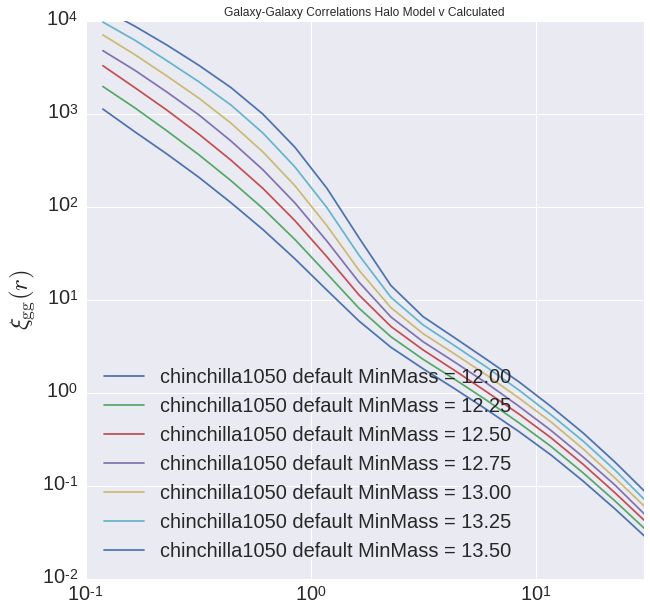

In [22]:
fig = plt.figure(figsize = (10,10))
for mMin, color in zip(sorted(data.iterkeys()), colors):
    #rbins = np.logspace(-1, 1.7, 20)
    #rbin_centers = (rbins[1:]+rbins[:-1])/2

    plt.plot(data[mMin][0,:], data[mMin][1,:], label = '%s default MinMass = %.2f'%(sim, mMin), color = color)
    #plt.plot(data[mMin][0,:], data[mMin][2,:], color = color)
    #plt.plot(data[mMin][0,:], data[mMin][3,:],ls = ':', color = color)

    #plt.plot(rbin_centers, data[mMin], label = '%s RedMagic MinMass = %.2f'%(sim, mMin), color = color)
    plt.plot(predictions[mMin][:,0], predictions[mMin][:,1], ls = '--', color = color  )
    #plt.plot(predictions[mMin][:,0], predictions[mMin][:,2], ls = '--', color = color  )

    
plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
plt.xlim(xmin = 0.1, xmax = 30)
plt.ylim(ymin = 1e-2, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)  

plt.show()

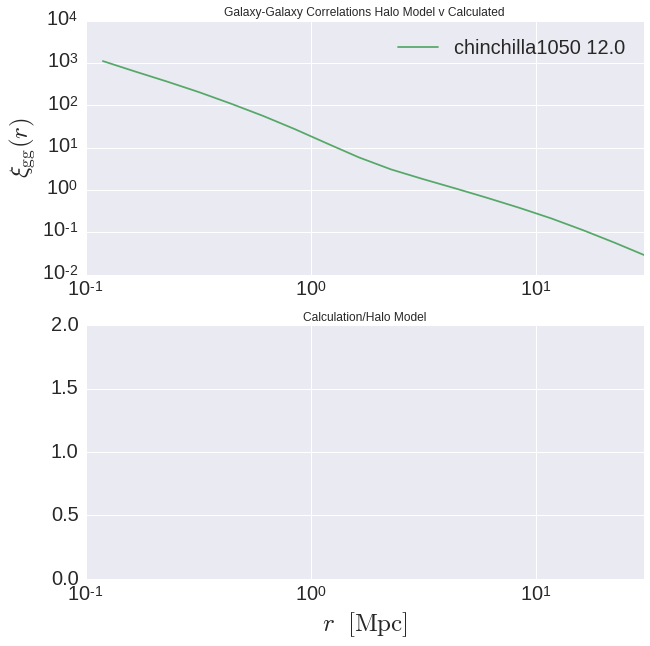

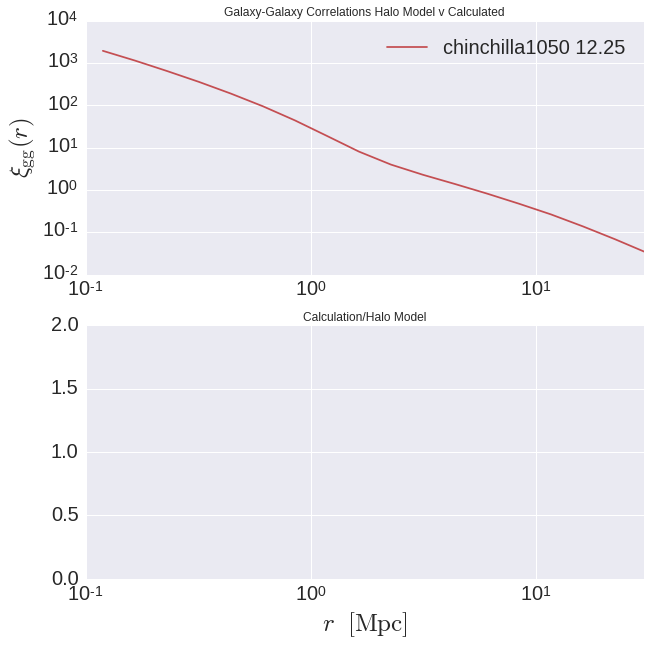

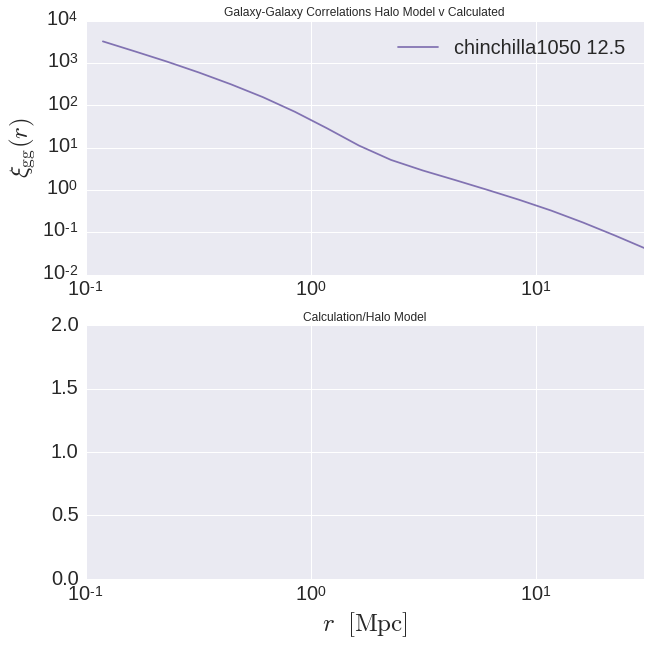

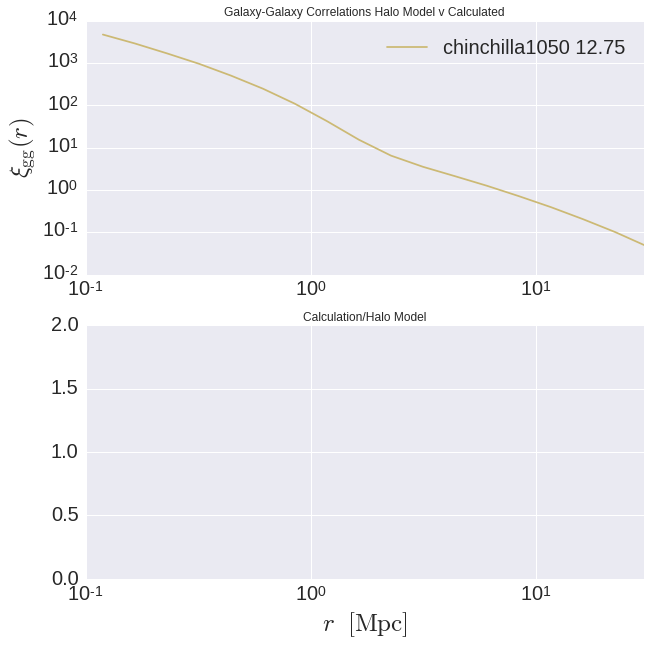

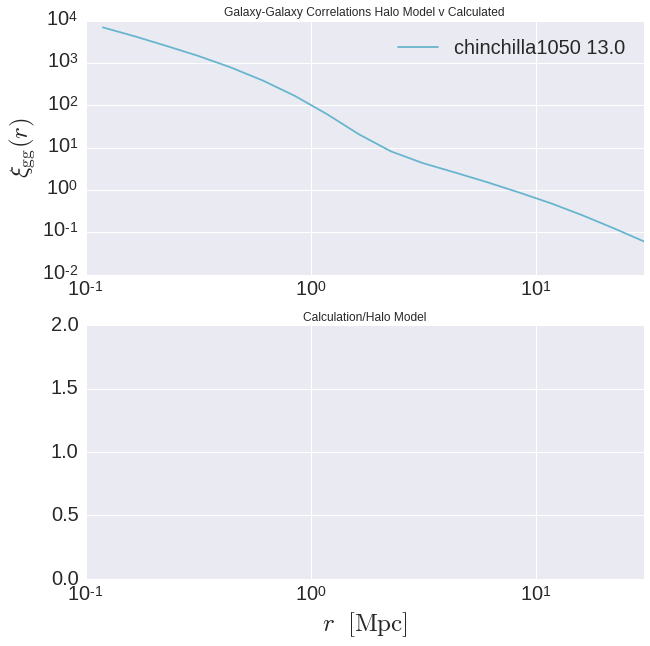

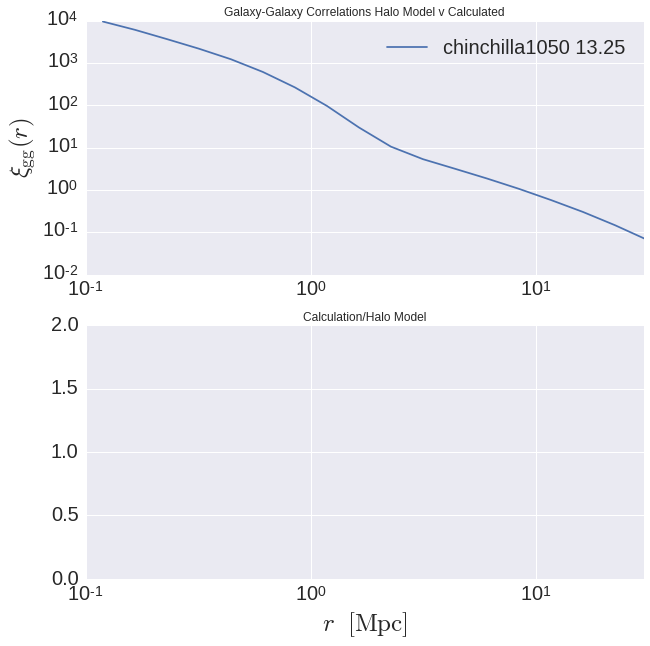

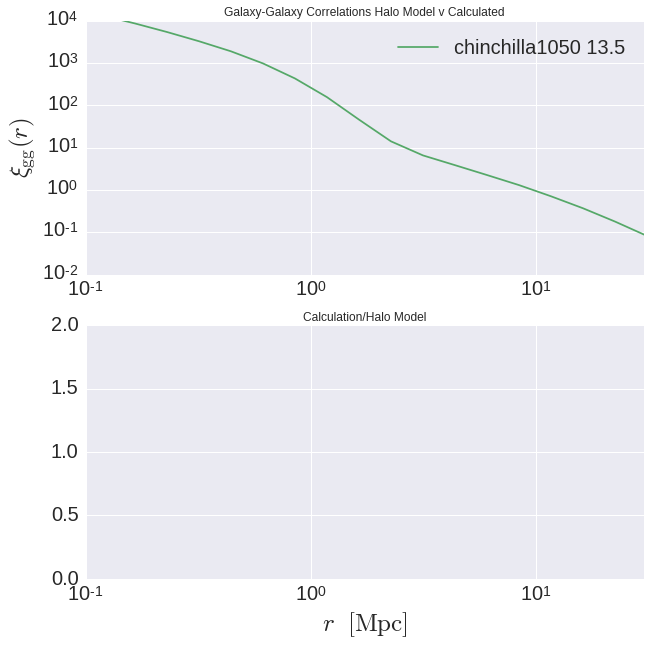

In [23]:
for label, color in zip(sorted(data.iterkeys()), colors):
    fig = plt.figure(figsize = (10,10))

    plt.subplot(211)
    plt.plot(data[label][0,:], data[label][1,:] , label = '%s %s'%(sim, label), color = color)
    plt.plot(predictions[label][:,0],predictions[label][:,1], ls = '--', color = color)
    
    plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 1e-2, ymax = 1e4)
    plt.loglog()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
    plt.legend(loc='best', fontsize=20)
    
    plt.subplot(212)
    plt.title('Calculation/Halo Model')
    plt.plot(data[label][0,:]/2, data[label][1,:]/predictions[label][:,1], color = color)
    
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 0, ymax = 2)
    #plt.loglog()
    plt.xscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)    

    plt.show()

In [24]:
#Chinchilla threshold / 12.25
ratio_prediction = {12.25:1.0,
12.50:1.27, 
12.75: 1.58, 
13.00: 1.95, 
13.25: 2.39, 
13.50: 2.93, 
13.75: 3.61}

In [25]:
print data.keys()

[12.25, 12.5, 12.75, 12.0, 13.0, 13.5, 13.25]


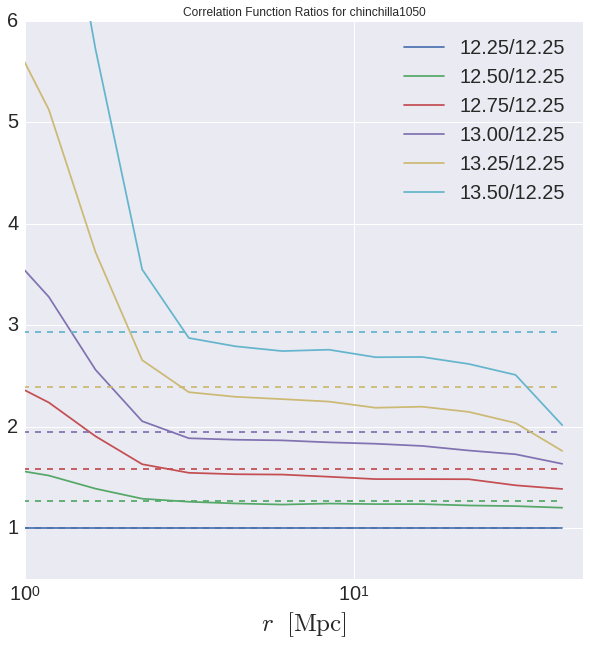

In [26]:
colors = cycle(sns.color_palette())

rbins = np.logspace(-1, 1.7, 20)
rbin_centers = (rbins[1:]+rbins[:-1])/2

fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
lowest_mass = 12.25#min(data.iterkeys())
for mm, color in zip(sorted(data.iterkeys())[1:], colors):
    #print '%.2f/12.25:\t'%(mm), '%.2f'%np.mean(data[mm][6:]/data[12.25][6:])
    plt.plot(data[mm][0,:], data[mm][1,:]/data[lowest_mass][1,:], label = '%.2f/%.2f'%(mm, lowest_mass), color = color)
    #plt.plot(predictions[mm][:,0], predictions[mm][:,1]/predictions[lowest_mass][:,1], ls = ':', color = color)

    plt.plot(data[mm][0,:], np.ones(predictions[mm][:,0].shape)*ratio_prediction[mm], ls = '--',color = color)
    
plt.title('Correlation Function Ratios for %s'%sim)
plt.xlim(xmin = 1, xmax = 50)

plt.ylim(ymin = 0.5, ymax = 6)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()

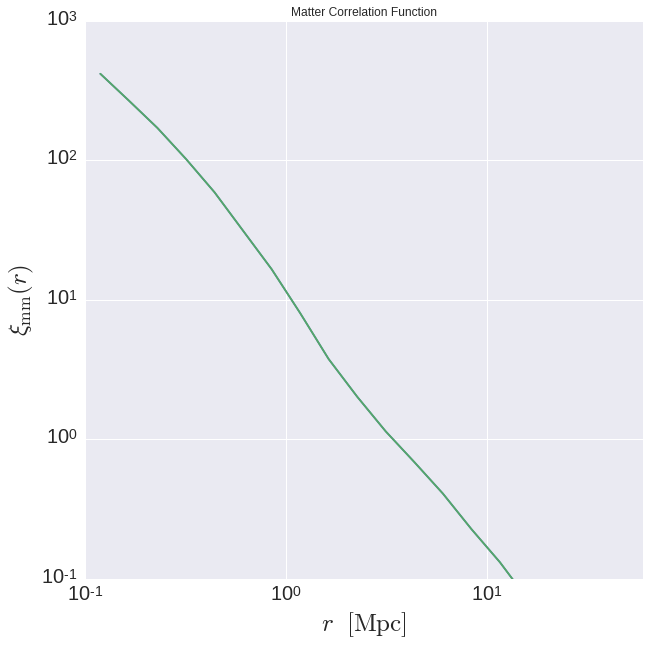

In [27]:
test = np.loadtxt('/u/ki/swmclau2/Git/Manticorr/xi_ch400_test.npy' , delimiter = ',')
low_xi = np.loadtxt('/u/ki/swmclau2/Git/Manticorr/xi_ch400_lowRes.npy' , delimiter = ',')
med_xi = np.loadtxt('/u/ki/swmclau2/Git/Manticorr/xi_ch400_medRes.npy' , delimiter = ',')
fig = plt.figure(figsize = (10,10))
centers = (low_xi[:,0]+low_xi[:,1])/2
plt.plot(centers, med_xi[:,3], label = 'Low Resolution')
plt.plot(centers, test, label = 'Test')
plt.title('Matter Correlation Function')
plt.xlim(xmin = 0.1, xmax = 60)
plt.ylim(ymin = 1e-1, ymax = 1e3)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm mm}(r)$', fontsize=25)

#plt.legend()

plt.show()

In [28]:
print (rbin_centers - centers)/rbin_centers

[  8.52511943e-07   1.86666047e-06   5.66789032e-07  -4.10507977e-07
   2.19659230e-07  -9.76151131e-08  -1.02445949e-07   2.86125932e-07
   9.17397207e-08  -5.87854250e-08   1.41019850e-08   4.49861647e-08
  -2.74773304e-09  -1.04978852e-09  -4.85566307e-09  -2.67510674e-08
   2.61297765e-09  -9.55333006e-09  -3.18098137e-08]


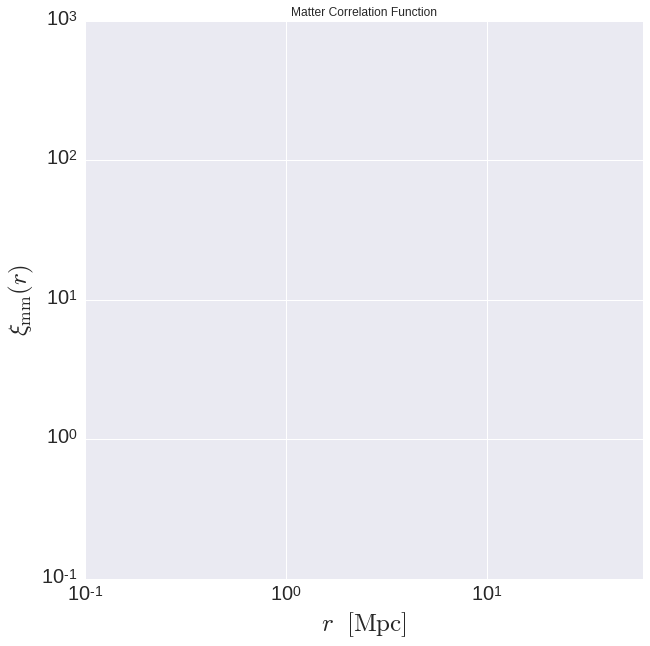

In [29]:
fig = plt.figure(figsize = (10,10))

plt.plot(centers, med_xi[:,3]-test)
plt.title('Matter Correlation Function')
plt.xlim(xmin = 0.1, xmax = 60)
plt.ylim(ymin = 1e-1, ymax = 1e3)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm mm}(r)$', fontsize=25)

#plt.legend()

plt.show()

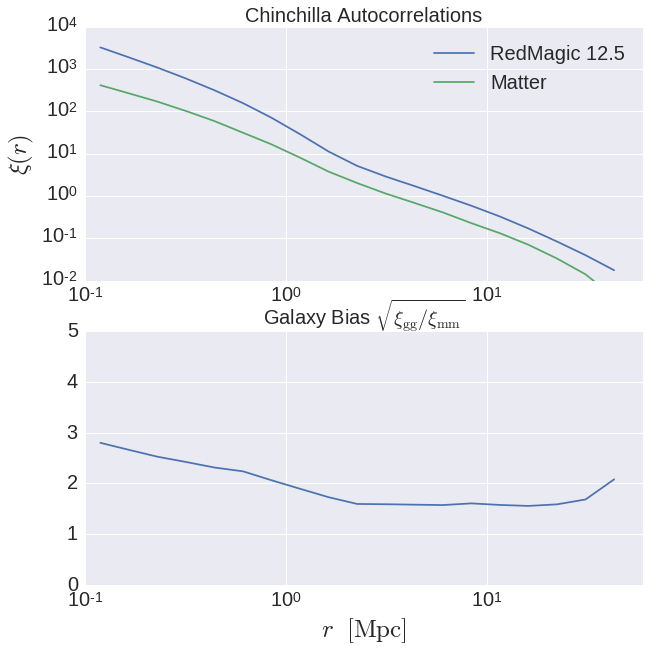

In [30]:
fig = plt.figure(figsize = (10,10))

mMin = 12.5
plt.subplot(211)

plt.plot(data[mMin][0,:],data[mMin][1,:], label = 'RedMagic %.1f'%mMin)
#plt.plot(predictions[mMin][:, 0],predictions[mMin][:,1], label = 'RedMagic mMin = %.1f'%mMin)
plt.plot(centers,  test, label = 'Matter')

plt.title('Chinchilla Autocorrelations', fontsize =20)
plt.xlim(xmin = 0.1, xmax = 60)
plt.ylim(ymin = 1e-2, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.subplot(212)
plt.title(r'Galaxy Bias $\sqrt{\xi_{\rm gg}/\xi_{\rm mm}}$', fontsize = 20)
plt.plot(data[mMin][0,:], (np.sqrt(data[mMin][1,:]/test)) )

plt.xlim(xmin = 0.1, xmax = 60)
plt.ylim(ymin = 0, ymax = 5)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)    

plt.show()

In [ ]:
x = np.stack(centers, med_xi[:,3])
x